In [ ]:
!pip install tensorflow==2.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 50.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0

I had to downgrade the TensorFlow version to 2.10.0 to match the TensorFlow version I have installed in VS code on my local system.

This is so I can load both the model and vocabulary tokens I saved later for deployment with Foask.

In [ ]:
import tensorflow as tf
tf.__version__

In [ ]:
# Load the dataset

import pandas as pd
movies = pd.read_csv('/content/drive/MyDrive/NLP dataset /IMDB Dataset/IMDB Dataset.csv')
movies.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


- The IMDB movies reviews had 2 columns, one for the review text, and the other for the sentiment

In [ ]:
## shape
movies.shape

(50000, 2)

In [ ]:
#value count
movies['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

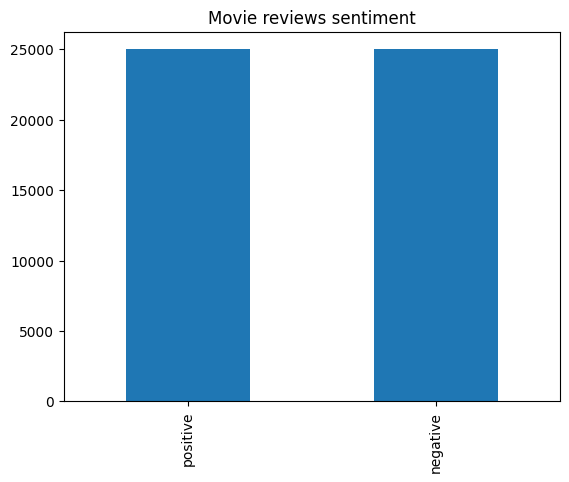

In [ ]:

# import matplotlib
import matplotlib.pyplot as plt
movies['sentiment'].value_counts().plot.bar()
plt.title('Movie reviews sentiment')
plt.savefig('Imdb_reviews_class')
plt.show()

The dataset is balanced

**Text Preprocessing**

In [ ]:
# import necessary preprocessing libraries
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords

In [ ]:
# remove stop words
word_pre = movies['review'].apply(remove_stopwords)
word_pre.head()

0    One reviewers mentioned watching 1 Oz episode ...
1    A wonderful little production. <br /><br />The...
2    I thought wonderful way spend time hot summer ...
3    Basically there's family little boy (Jake) thi...
4    Petter Mattei's "Love Time Money" visually stu...
Name: review, dtype: object

In [ ]:
# apply simple_preprocess
cleaned = word_pre.apply(simple_preprocess)
cleaned.head()

0    [one, reviewers, mentioned, watching, oz, epis...
1    [wonderful, little, production, br, br, the, f...
2    [thought, wonderful, way, spend, time, hot, su...
3    [basically, there, family, little, boy, jake, ...
4    [petter, mattei, love, time, money, visually, ...
Name: review, dtype: object

In [ ]:
cleaned[1]

['wonderful',
 'little',
 'production',
 'br',
 'br',
 'the',
 'filming',
 'technique',
 'unassuming',
 'old',
 'time',
 'bbc',
 'fashion',
 'gives',
 'comforting',
 'discomforting',
 'sense',
 'realism',
 'entire',
 'piece',
 'br',
 'br',
 'the',
 'actors',
 'extremely',
 'chosen',
 'michael',
 'sheen',
 'has',
 'got',
 'polari',
 'voices',
 'pat',
 'too',
 'you',
 'truly',
 'seamless',
 'editing',
 'guided',
 'references',
 'williams',
 'diary',
 'entries',
 'worth',
 'watching',
 'terrificly',
 'written',
 'performed',
 'piece',
 'masterful',
 'production',
 'great',
 'master',
 'comedy',
 'life',
 'br',
 'br',
 'the',
 'realism',
 'comes',
 'home',
 'little',
 'things',
 'fantasy',
 'guard',
 'which',
 'use',
 'traditional',
 'dream',
 'techniques',
 'remains',
 'solid',
 'disappears',
 'it',
 'plays',
 'knowledge',
 'senses',
 'particularly',
 'scenes',
 'concerning',
 'orton',
 'halliwell',
 'sets',
 'particularly',
 'flat',
 'halliwell',
 'murals',
 'decorating',
 'surface',
 't

In [ ]:
movies['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [ ]:
# add cleaned reviews to the data frame
movies['cleaned_review'] = cleaned
movies.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, oz, epis..."
1,A wonderful little production. <br /><br />The...,positive,"[wonderful, little, production, br, br, the, f..."
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,"[basically, there, family, little, boy, jake, ..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, love, time, money, visually, ..."


In [ ]:
# length of each review

movies['Len_word'] = [len(movies['review'][i]) for i in range(len(movies['review']))]
movies['cleaned_Len_word'] = [len(movies['cleaned_review'][i]) for i in range(len(movies['cleaned_review']))]

movies.head()

,review,sentiment,cleaned_review,Len_word,cleaned_Len_word
0,One of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, oz, epis...",1761,175
1,A wonderful little production. <br /><br />The...,positive,"[wonderful, little, production, br, br, the, f...",998,91
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su...",926,83
3,Basically there's a family where a little boy ...,negative,"[basically, there, family, little, boy, jake, ...",748,73
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, love, time, money, visually, ...",1317,123


- There is a huge difference between the number of words in the text before and after the preprocessing techniques.

In [ ]:
# cleaned reviews with the maximum number of words
import numpy as np
np.max(movies['cleaned_Len_word'])

1419

* A cleaned review has 1419 words, which is the highest in the documents

### GENERATE WORDCLOUDS FROM THE REVIEWS

In [ ]:
# import the necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


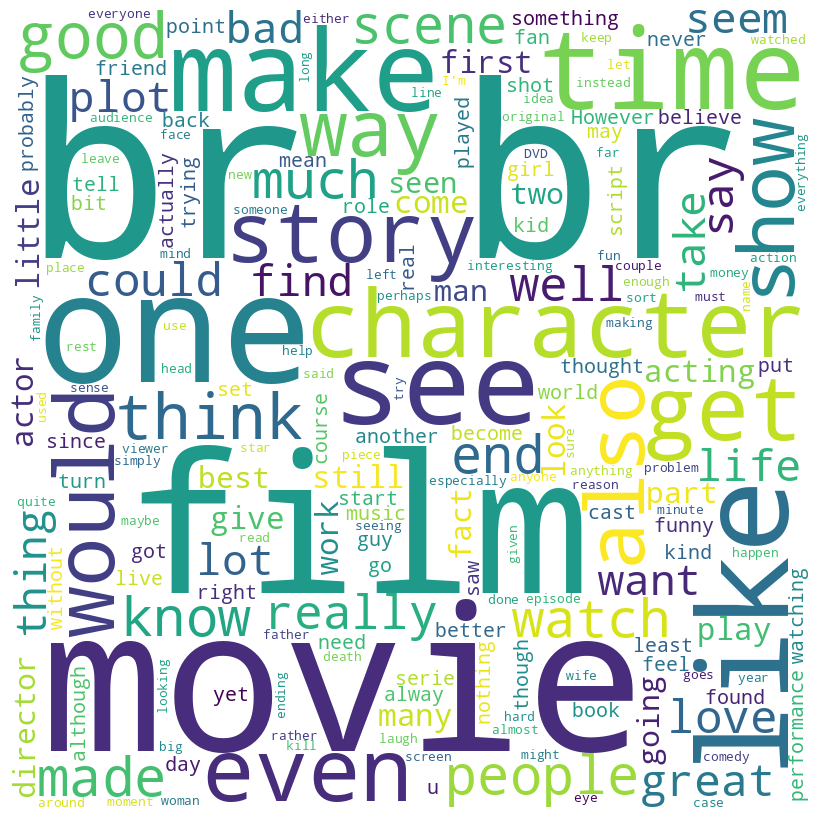

In [ ]:

# General word cloud
stop_words = set(stopwords.words('english'))
text = " ".join(review for review in movies['review'])

wordcloud = WordCloud(stopwords=stop_words,  width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('reviews_ wordcloud.png')
plt.show()

In [ ]:

# positive and negative sentiment dataframe

positive = movies[movies['sentiment'] == 'positive']
negative = movies[movies['sentiment'] == 'negative']

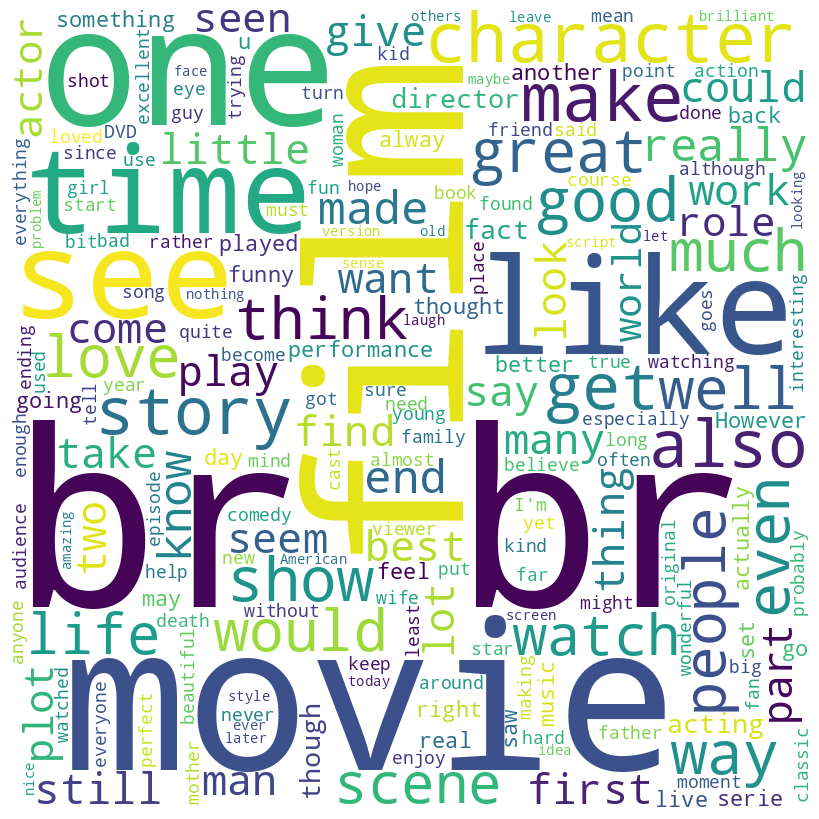

In [ ]:

# Positive reviews word cloud

stop_words = set(stopwords.words('english'))
text = " ".join(review for review in positive['review'])

wordcloud = WordCloud(stopwords=stop_words,  width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('positive_reviews_wordcloud.png')
plt.show()

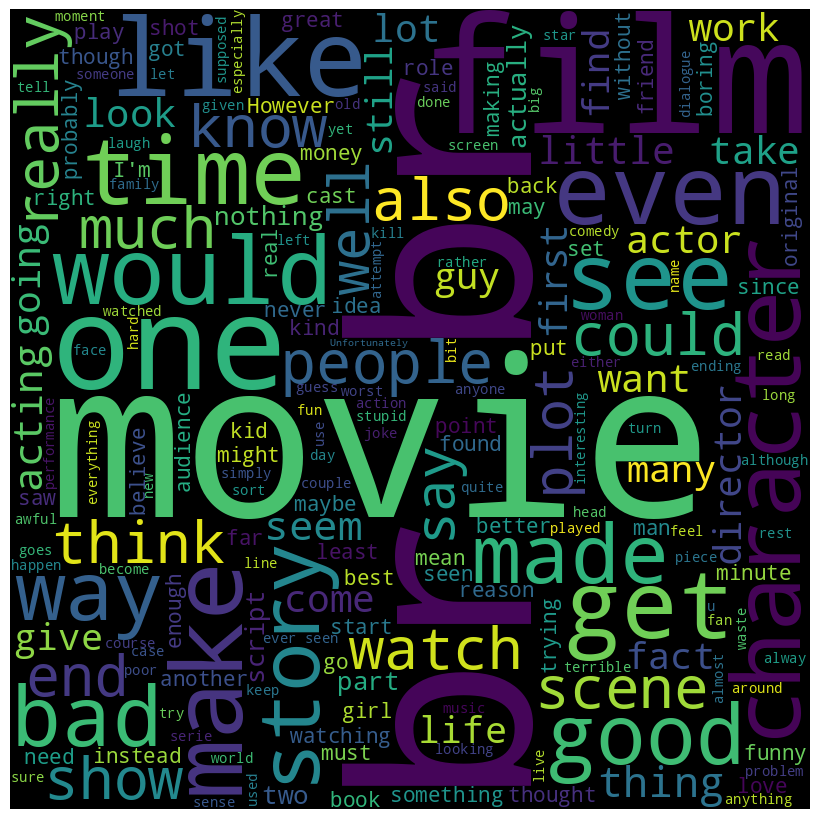

In [ ]:

# Negative reviews word cloud

stop_words = set(stopwords.words('english'))
text = " ".join(review for review in negative['review'])

wordcloud = WordCloud(stopwords=stop_words,  width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('negative_reviews_wordcloud.png')
plt.show()

In [ ]:
pd.Series(movies['cleaned_review'])

0        [one, reviewers, mentioned, watching, oz, epis...
1        [wonderful, little, production, br, br, the, f...
2        [thought, wonderful, way, spend, time, hot, su...
3        [basically, there, family, little, boy, jake, ...
4        [petter, mattei, love, time, money, visually, ...
                               ...                        
49995    [thought, movie, right, good, job, it, wasn, c...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [catholic, taught, parochial, elementary, scho...
49998    [going, disagree, previous, comment, maltin, o...
49999    [no, expects, star, trek, movies, high, art, f...
Name: cleaned_review, Length: 50000, dtype: object

In [ ]:
movies.head()

,review,sentiment,cleaned_review,Len_word,cleaned_Len_word
0,One of the other reviewers has mentioned that ...,positive,"[one, reviewers, mentioned, watching, oz, epis...",1761,175
1,A wonderful little production. <br /><br />The...,positive,"[wonderful, little, production, br, br, the, f...",998,91
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonderful, way, spend, time, hot, su...",926,83
3,Basically there's a family where a little boy ...,negative,"[basically, there, family, little, boy, jake, ...",748,73
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, love, time, money, visually, ...",1317,123


In [ ]:
tex = " ".join(review for review in movies['cleaned_review'] if isinstance(review, str))

In [ ]:
movies['cleaned_review'][0]

['one',
 'reviewers',
 'mentioned',
 'watching',
 'oz',
 'episode',
 'you',
 'll',
 'hooked',
 'they',
 'right',
 'exactly',
 'happened',
 'me',
 'br',
 'br',
 'the',
 'thing',
 'struck',
 'oz',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'me',
 'faint',
 'hearted',
 'timid',
 'this',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'violence',
 'its',
 'hardcore',
 'classic',
 'use',
 'word',
 'br',
 'br',
 'it',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'it',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'em',
 'city',
 'home',
 'many',
 'aryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'more',
 'so',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'far',
 'away',
 'br',
 'b

### Split the dataset

In [ ]:
# target and predictors variables
X = movies['cleaned_review']
y = movies['sentiment']

In [ ]:
 # train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.19, random_state = 504, stratify = y)

In [ ]:
#  shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40500,), (9500,), (40500,), (9500,))

**BUILD A WORD2VEC MODEL**

In [ ]:
# import word2vec
from gensim.models import Word2Vec

In [ ]:
# build
w2v_model = Word2Vec(X_train, window = 10, min_count = 10, epochs = 25)
w2v_model

In [ ]:
len(w2v_model.wv.key_to_index)

25159

In [ ]:
w2v_model.wv.most_similar('character')

[('characters', 0.7284989953041077),
 ('protagonist', 0.6093320846557617),
 ('role', 0.5681081414222717),
 ('villain', 0.5159525275230408),
 ('personality', 0.5112618207931519),
 ('preoccupation', 0.4638802111148834),
 ('everyman', 0.4409862458705902),
 ('relationship', 0.43769240379333496),
 ('protagonists', 0.4247921407222748),
 ('caricature', 0.41888144612312317)]

In [ ]:
w2v_model.wv.most_similar('nice')

[('good', 0.7222892045974731),
 ('neat', 0.628820538520813),
 ('cool', 0.6148824691772461),
 ('great', 0.5934968590736389),
 ('liked', 0.5762264132499695),
 ('too', 0.5290327072143555),
 ('interesting', 0.5273572206497192),
 ('pretty', 0.5207499861717224),
 ('fine', 0.5072206258773804),
 ('decent', 0.5071324110031128)]

In [ ]:
w2v_model.wv.most_similar('horror')

[('slasher', 0.7531806826591492),
 ('splatter', 0.6520320773124695),
 ('slashers', 0.6420978903770447),
 ('gore', 0.6385707855224609),
 ('scary', 0.6068780422210693),
 ('gory', 0.588880181312561),
 ('genre', 0.5824935436248779),
 ('scares', 0.5818644762039185),
 ('zombie', 0.5576675534248352),
 ('thrills', 0.5568751692771912)]

In [ ]:
w2v_model.wv.most_similar('drama')

[('thriller', 0.6147886514663696),
 ('dramas', 0.5876036882400513),
 ('dramatic', 0.5389100909233093),
 ('melodrama', 0.5317367315292358),
 ('romance', 0.5284860134124756),
 ('comedy', 0.52785325050354),
 ('docu', 0.5062278509140015),
 ('suspense', 0.5046195983886719),
 ('engrossing', 0.50239098072052),
 ('story', 0.48797231912612915)]

In [ ]:
w2v_model.wv.key_to_index

{'br': 0,
 'the': 1,
 'movie': 2,
 'it': 3,
 'film': 4,
 'like': 5,
 'this': 6,
 'good': 7,
 'time': 8,
 'story': 9,
 'and': 10,
 'there': 11,
 'bad': 12,
 'you': 13,
 'people': 14,
 'great': 15,
 'don': 16,
 'but': 17,
 'that': 18,
 'in': 19,
 'he': 20,
 'way': 21,
 'movies': 22,
 'characters': 23,
 'think': 24,
 'character': 25,
 'watch': 26,
 'films': 27,
 'seen': 28,
 'love': 29,
 'plot': 30,
 'life': 31,
 'acting': 32,
 'know': 33,
 'best': 34,
 'little': 35,
 'one': 36,
 'if': 37,
 'man': 38,
 'all': 39,
 'better': 40,
 'end': 41,
 'scene': 42,
 'scenes': 43,
 'well': 44,
 've': 45,
 'they': 46,
 'real': 47,
 'thing': 48,
 'watching': 49,
 'actors': 50,
 'what': 51,
 'funny': 52,
 'years': 53,
 'doesn': 54,
 'didn': 55,
 'director': 56,
 're': 57,
 'old': 58,
 'as': 59,
 'not': 60,
 'work': 61,
 'so': 62,
 'actually': 63,
 'makes': 64,
 'look': 65,
 'can': 66,
 'going': 67,
 'she': 68,
 'is': 69,
 'new': 70,
 'lot': 71,
 'cast': 72,
 'world': 73,
 'things': 74,
 'want': 75,
 'pre

In [ ]:
w2v_model.wv.most_similar('recommended')

[('recommend', 0.8279258012771606),
 ('recommendable', 0.6411665081977844),
 ('recommending', 0.5757364630699158),
 ('recomend', 0.5539811849594116),
 ('enjoyable', 0.5356115698814392),
 ('advise', 0.5235090255737305),
 ('suggest', 0.5085297226905823),
 ('entertaining', 0.5056543946266174),
 ('regarded', 0.4970206618309021),
 ('recommendation', 0.4725823402404785)]

In [ ]:
w2v_model.wv.most_similar('memorable')

[('unforgettable', 0.5708267092704773),
 ('standout', 0.5491999387741089),
 ('marvelous', 0.5423150062561035),
 ('poignant', 0.5182726383209229),
 ('terrific', 0.517195999622345),
 ('highlight', 0.5171753168106079),
 ('impressive', 0.5140964388847351),
 ('chilling', 0.511525571346283),
 ('noteworthy', 0.5097820162773132),
 ('strongest', 0.5093029141426086)]

In [ ]:
# word to index
word2idx = w2v_model.wv.key_to_index

In [ ]:
w2v_model.vector_size

100

In [ ]:

import numpy as np
embedding_matr = np.zeros((len(word2idx), w2v_model.vector_size))

### Create embedding matrix

In [ ]:
# import numpy
import numpy as np

# create a matrix of shape "len(word2idx" and "model.vector_size"
# and fill with zeros
embedding_matrix = np.zeros((len(word2idx), w2v_model.vector_size))
for word, i in word2idx.items():
    # get the embedding vector of each word
    embedding_vector = w2v_model.wv[word]
    if embedding_vector is not None:
        # fill the matrix up with the vectors
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix.shape

(25159, 100)

### Tokenize the sentences

In [ ]:

# import necessary libary
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [ ]:
#instantiate
tokenizer = Tokenizer()

# fit on the train texts
tokenizer.fit_on_texts(X_train)

SAVING THE VOCABULARY TOKENS

In [ ]:
# jmport
import joblib

#Specify the file path where you want to save the tokens
file_path = 'vocabulary_tokens2.pkl'

# Save the vocabulary tokens to a joblib file
joblib.dump(tokenizer, file_path)

['vocabulary_tokens2.pkl']

In [ ]:
# convert text to numerical sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)

# pad sequences to a fixed length
X_train_pad = pad_sequences(X_train_seq, maxlen = 500)

In [ ]:
# convert text to numerical sequences
X_test_seq = tokenizer.texts_to_sequences(X_test)

# pad sequences to a fixed length
X_test_pad = pad_sequences(X_test_seq, maxlen = 500)

In [ ]:
# mappings
mappings = {'positive':1, 'negative':0}

In [ ]:
y_train_map = y_train.map(mappings)
y_test_map = y_test.map(mappings)

In [ ]:
y_test.value_counts()

negative    4750
positive    4750
Name: sentiment, dtype: int64

In [ ]:
y_tr_f = np.asarray(y_train_map).astype("float64")
y_ts_f = np.asarray(y_test_map).astype("float64")

In [ ]:
y_tr_f

array([1., 1., 0., ..., 0., 0., 0.])

In [ ]:
y_ts_f

array([0., 1., 1., ..., 0., 1., 0.])

In [ ]:
voocab_size = len(tokenizer.word_index) + 1
voocab_size

91337

### Modelling

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense

In [ ]:
model = Sequential()

model.add(Embedding(len(word2idx), w2v_model.vector_size, weights = [embedding_matrix], input_length =500, trainable = False))
model.add(GRU(192,dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation = 'softmax'))
model.summary()

# compile the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
          optimizer = tf.keras.optimizers.legacy.Adam(), metrics = ['accuracy'])

# fit the model
num_epochs = 10
history = model.fit(X_train_pad, y_train_map, batch_size = 372,
                    epochs=num_epochs, validation_data = (X_test_pad, y_test_map), verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 100)          2515900   
                                                                 
 gru (GRU)                   (None, 192)               169344    
                                                                 
 dense (Dense)               (None, 2)                 386       
                                                                 
Total params: 2,685,630
Trainable params: 169,730
Non-trainable params: 2,515,900
_________________________________________________________________
Epoch 1/10
109/109 [==============================] - 266s 2s/step - loss: 0.6548 - accuracy: 0.6057 - val_loss: 0.5692 - val_accuracy: 0.7042
Epoch 2/10
109/109 [==============================] - 246s 2s/step - loss: 0.5097 - accuracy: 0.7532 - val_loss: 0.4387 - val_accuracy: 0.8080
Epoch 3/10
109/109

### MODEL EVALUATION

In [ ]:
# model evaluation
model.evaluate(X_test_pad, y_test_map, batch_size = 524)

19/19 [==============================] - 2s 119ms/step - loss: 0.3707 - accuracy: 0.8583


[0.37068507075309753, 0.8583157658576965]

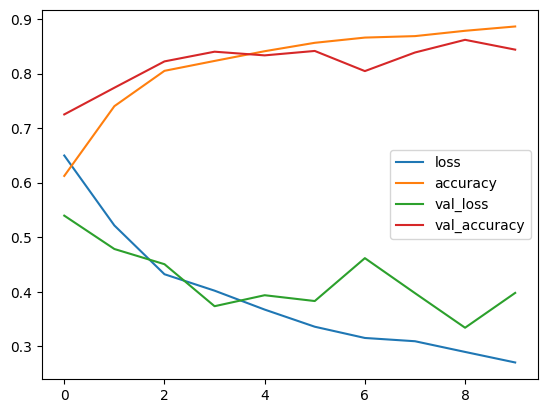

In [ ]:

# loss and accuracy curve
import pandas as pd
pd.DataFrame(history.history).plot()
plt.savefig('loss&accuracy curve.jpg')

In [ ]:
# prediction probabilities
pred_prob = model.predict(X_test_pad)
pred_prob[1]

297/297 [==============================] - 39s 129ms/step


array([0.00675516, 0.9932448 ], dtype=float32)

In [ ]:
pred_prob[1][1]

0.9932448

In [ ]:
# class predictions
pred = pred_prob.argmax(axis = 1)
pred[:20]

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [ ]:
pd.Series(pred).value_counts()

1    4764
0    4736
dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# confusion matrix
confusion_matrix(pred, y_test_map)

array([[4070,  666],
       [ 680, 4084]])

Text(70.72222222222221, 0.5, 'Truth')

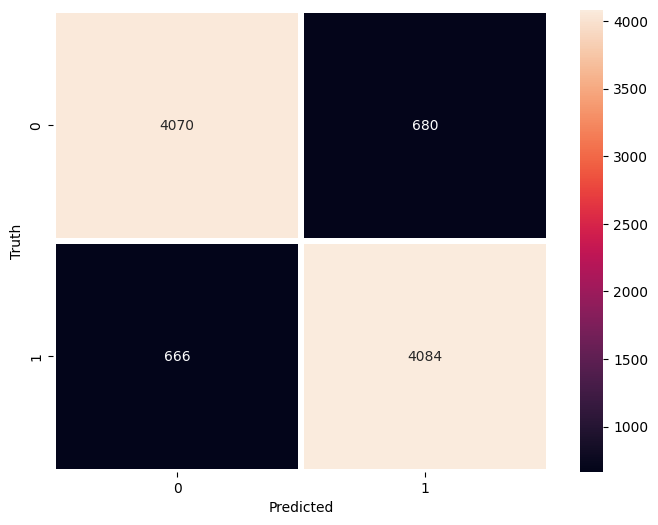

In [ ]:

# heatmap
import seaborn as sns
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test_map, pred), annot = True,
            fmt = 'd', linewidth = 3)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# classification report
print(classification_report(y_test_map, pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4750
           1       0.86      0.86      0.86      4750

    accuracy                           0.86      9500
   macro avg       0.86      0.86      0.86      9500
weighted avg       0.86      0.86      0.86      9500



* Determine the sentiment of a generated movie reviews

In [ ]:
reviews_gen = ["I had high hopes for John Wick 4. And given the release date was extended, I thought it was going to be a blockbuster, but I was wrong. I hope the producer will do better in the next release if there is going to be one.", "24 hours and Jack Bauer was oustanding. That's the only movie I can watch over and over again without getting bored"]

In [ ]:
# convert text to sequences
seq = tokenizer.texts_to_sequences(reviews_gen)
pad_seq = pad_sequences(seq, maxlen = 1000)

# predict
proba = model.predict(pad_seq)
Predict_labels = []
for i in range(len(proba)):
    if proba[i][0] > 0.5:
        Predict_labels.append(1)
    else:
        Predict_labels.append(0)

1/1 [==============================] - 0s 274ms/step


In [ ]:
proba

array([[0.56835496, 0.43164504],
       [0.8873    , 0.11269994]], dtype=float32)

In [ ]:
Predict_labels

[0, 1]

In [ ]:
for i in range(len(reviews_gen)):
    print(reviews_gen[i])
    if Predict_labels[i] == 1:
        s = 'Positive'
    else:
        s = 'Negative'
    print("Predicted sentiment : ",s)

I had high hopes for John Wick 4. And given the release date was extended, I thought it was going to be a blockbuster, but I was wrong. I hope the producer will do better in the next release if there is going to be one.
Predicted sentiment :  Negative
24 hours and Jack Bauer was oustanding. That's the only movie I can watch over and over again without getting bored
Predicted sentiment :  Positive


### AI-generated movie reviews to test the model

In [ ]:

AI2_movie_reviews = [
    "I was blown away by this film! The acting was top-notch, and the plot kept me engaged from start to finish.",
    "Unfortunately, this movie didn't live up to the hype. The story felt disjointed, and the characters lacked depth.",
    "A true cinematic gem! The visuals were stunning, and the emotional depth of the story left me in tears.",
    "I had a great time watching this movie. It's a perfect blend of humor and action that kept me entertained throughout.",
    "This film is an instant classic. The performances were exceptional, and the storytelling was masterful."
]

In [ ]:

AI_movie_reviews = [
    "This movie was a masterpiece! The acting, direction, and plot were outstanding. I couldn't take my eyes off the screen.",
    "I'm sorry, but this movie was a huge disappointment. The storyline was confusing, and the acting was mediocre at best.",
    "What an incredible film! The cinematography was breathtaking, and the cast delivered stellar performances. I was on the edge of my seat the whole time.",
    "I found this movie to be quite enjoyable. While it had its flaws, the humor and character development made it a fun watch.",
    "This movie is a must-see! It's an emotional rollercoaster with a compelling story and exceptional performances. I can't recommend it enough."
]

In [ ]:
# Model testing function

def SA_test(reviews):
    # convert text to sequences
    seq2 = tokenizer.texts_to_sequences(reviews)
    pad_seq2 = pad_sequences(seq2, maxlen = 1000)

    # predict
    proba2 = model.predict(pad_seq2)
    Predict_labels2 = []
    for i in range(len(proba2)):
        if proba2[i][1] > 0.5:
            Predict_labels2.append(1)
        else:
            Predict_labels2.append(0)

    for i in range(len(AI_movie_reviews)):
        print(AI_movie_reviews[i])
        if Predict_labels2[i] == 1:
            s = 'Positive'
        else:
            s = 'Negative'
        print("Predicted sentiment : ",s)

In [ ]:
SA_test(AI2_movie_reviews)

1/1 [==============================] - 0s 270ms/step
This movie was a masterpiece! The acting, direction, and plot were outstanding. I couldn't take my eyes off the screen.
Predicted sentiment :  Positive
I'm sorry, but this movie was a huge disappointment. The storyline was confusing, and the acting was mediocre at best.
Predicted sentiment :  Negative
What an incredible film! The cinematography was breathtaking, and the cast delivered stellar performances. I was on the edge of my seat the whole time.
Predicted sentiment :  Positive
I found this movie to be quite enjoyable. While it had its flaws, the humor and character development made it a fun watch.
Predicted sentiment :  Positive
This movie is a must-see! It's an emotional rollercoaster with a compelling story and exceptional performances. I can't recommend it enough.
Predicted sentiment :  Positive


In [ ]:

john_wick_reviews = [
    "John Wick is an action-packed masterpiece. Keanu Reeves delivers an unforgettable performance as the legendary hitman.",
    "The John Wick series is a modern action classic, and the third installment doesn't disappoint. It's non-stop excitement from start to finish.",
    "I can't get enough of John Wick's stylish action sequences. The choreography and world-building are simply exceptional.",
    "John Wick is a breath of fresh air in the action genre. It's all about revenge, and it's executed brilliantly with a touch of dark humor.",
    "Keanu Reeves as John Wick is a force of nature. The franchise continues to set the bar high for action movies."
]

In [ ]:
SA_test(john_wick_reviews)

1/1 [==============================] - 1s 502ms/step
John Wick is an action-packed masterpiece. Keanu Reeves delivers an unforgettable performance as the legendary hitman.
Predicted sentiment :  Positive
The John Wick series is a modern action classic, and the third installment doesn't disappoint. It's non-stop excitement from start to finish.
Predicted sentiment :  Positive
I can't get enough of John Wick's stylish action sequences. The choreography and world-building are simply exceptional.
Predicted sentiment :  Positive
John Wick is a breath of fresh air in the action genre. It's all about revenge, and it's executed brilliantly with a touch of dark humor.
Predicted sentiment :  Positive
Keanu Reeves as John Wick is a force of nature. The franchise continues to set the bar high for action movies.
Predicted sentiment :  Negative


In [ ]:

movie_reviews_24_hours = [
    "24 Hours was a heart-pounding thriller that had me at the edge of my seat throughout. Kudos to the director for a gripping experience!",
    "I had high hopes for 24 Hours, but it left me disappointed. The plot was confusing, and the characters lacked depth.",
    "This movie is a rollercoaster of emotions. I laughed, I cried, and I was thoroughly entertained. A must-see!",
    "Unfortunately, 24 Hours falls flat. The storyline was predictable, and the acting was subpar at best.",
    "I couldn't get enough of 24 Hours. The suspense and tension build up beautifully, making it a memorable cinematic experience.",
    "24 Hours is a complete waste of time. The dialogue is cringe-worthy, and the plot is an uninspired mess."
]

In [ ]:
SA_test(movie_reviews_24_hours)

1/1 [==============================] - 1s 715ms/step
24 Hours was a heart-pounding thriller that had me at the edge of my seat throughout. Kudos to the director for a gripping experience!
Predicted sentiment :  Positive
I had high hopes for 24 Hours, but it left me disappointed. The plot was confusing, and the characters lacked depth.
Predicted sentiment :  Negative
This movie is a rollercoaster of emotions. I laughed, I cried, and I was thoroughly entertained. A must-see!
Predicted sentiment :  Positive
Unfortunately, 24 Hours falls flat. The storyline was predictable, and the acting was subpar at best.
Predicted sentiment :  Negative
I couldn't get enough of 24 Hours. The suspense and tension build up beautifully, making it a memorable cinematic experience.
Predicted sentiment :  Positive
24 Hours is a complete waste of time. The dialogue is cringe-worthy, and the plot is an uninspired mess.
Predicted sentiment :  Negative


### SAVING AND LOADING MODELS

In [ ]:
model.save('IMDb_reviews_SA.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

# to load model
# loaded_model = tf.keras.models.load_model("IMDb_reviews_SA.h5")

### SAVING THE VOCABULARY MODELS

In [ ]:
import pickle

In [ ]:
with open('IMDb_SA_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:

# to load the saved vocab token pickle file
# with open('tokenizer.pickle', 'rb') as handle:
    # loaded_tokenizer = pickle.load(handle)